## Importing Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pymysql
from concurrent.futures import ThreadPoolExecutor


 requests: For making HTTP requests to web pages./
 BeautifulSoup: For parsing HTML content.
re: For using regular expressions to search for patterns.
pymysql: For connecting to and interacting with a MySQL database.
ThreadPoolExecutor: For parallel processing to speed up the scraping process.

# Database Connection

In [ ]:
# Database connection
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='Nandini@123',
    database='webscrapdb1',
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
)


# Establishes a connection to a MySQL database using the pymysql library.
cursorclass=pymysql.cursors.DictCursor makes the cursor return results as dictionaries.

In [2]:
# List of URLs to scrape
urls = [
     # Technology and Education
    'https://www.codingninjas.com',
    'https://www.khanacademy.org',
    'https://www.geeksforgeeks.org',
    'https://www.codingblocks.com',
    'https://www.chdeducation.gov.in',
    'https://byjus.com',
    'https://www.w3schools.com',
    'https://www.tutorialspoint.com',
    'https://www.coursera.org',
    'https://www.udemy.com',
    'https://www.upgrad.com',
    'https://www.simplilearn.com',
    'https://www.edureka.co',
    'https://www.verandalearning.com',
    'https://jkshahclasses.com',
    'https://unacademy.com',
    'https://upsc.gov.in',
    'https://www.col.org',
    'https://learn.microsoft.com',
    'https://www.stackoverflow.com',
    'https://www.codecademy.com',
    'https://www.udacity.com',
    # Shopping sites
    'https://www.aritzia.com',
    'https://shop.lululemon.com',
    'https://aeo.abfrl.in',
    'https://levi.in',
    'https://www.pepejeans.in',
    'https://calvinklein.nnnow.com',
    'https://www.hollisterco.com',
    'https://pt.sacoorbrothers.com',
    'https://www.mr-blue.in',
    'https://shop.mango.com',
    'https://www.ebay.com',
    'https://www.alibaba.com',
    'https://www.shopify.com',
    'https://www.forever21.com',
    # News and Information
    'https://www.bbc.com',
    'https://www.cnn.com',
    'https://www.nytimes.com',
    'https://www.theguardian.com',
    'https://www.aljazeera.com',
    'https://www.washingtonpost.com',
    'https://www.forbes.com',
    'https://www.bloomberg.com',
    'https://edition.cnn.com',
    'https://www.usatoday.com',
    'https://www.npr.org',
    'https://www.economist.com',
    # Technology
    'https://www.techcrunch.com',
    'https://www.wired.com',
    'https://www.theverge.com',
    'https://www.gizmodo.com',
    'https://www.cnet.com',
    'https://www.techradar.com',
    'https://www.engadget.com',
    'https://www.digitaltrends.com',
    'https://www.pcworld.com',
    'https://www.androidauthority.com',
    'https://vaaree.com',
    'https://www.maxfashion.in',
    'https://www.ndtv.com',
    'https://shopping.indiamart.com',
    'https://deyga.in',
    'https://www.buywow.in',
    'https://www.khadinatural.com',
    'https://nathabit.in',
    'https://divinenutrition.in',
    
    # Health and Wellness
    'https://www.mayoclinic.org',
    'https://www.healthline.com',
    'https://www.medicalnewstoday.com',
    'https://www.menshealth.com',
    'https://www.womenshealthmag.com',
    'https://www.everydayhealth.com',
    'https://www.self.com',
    'https://www.psychologytoday.com',
    'https://www.mindbodygreen.com',
    # Entertainment
    'https://www.netflix.com',
    'https://www.hulu.com',
    'https://www.disneyplus.com',
    'https://www.hbo.com',
    'https://www.spotify.com',
    'https://www.apple.com/apple-tv-plus',
    'https://www.rottentomatoes.com',
    'https://www.billboard.com',
    'https://www.polygon.com',
    # Food and Cooking
    'https://www.chipotle.com',
    'https://www.panerabread.com',
    'https://www.chilis.com',
    'https://chilisindia.com',
    'https://www.foodnetwork.com',
    'https://www.bonappetit.com',
    'https://www.epicurious.com',
    'https://www.tasty.co',
    'https://www.goodfoods.com',
    'https://www.chowhound.com',
    'https://www.bbcgoodfood.com',
    'https://www.delish.com',
    'https://www.fao.org',
     'https://www.smh.com.au'
    'https://bikanervala.com',
    'https://www.jiomart.com',
    # Travel
    'https://www.booking.com',
    'https://www.airbnb.com',
    'https://www.kayak.com',
    #University
    'https://online.gndu.ac.in',
    'https://www.unwsp.edu',

]


 # Detect MVC/CMS Frameworks(Helper Functions)

In [3]:
# Function to detect MVC frameworks
def detect_mvc(content):
    mvc_patterns = [
        r'\bASP\.NET\b', r'\bDjango\b', r'\bRuby on Rails\b', r'\bLaravel\b',
        r'\bSpring\b', r'\bAngular\b', r'\bReact\b', r'\bVue\b'
    ]
    return [pattern for pattern in mvc_patterns if re.search(pattern, content, re.IGNORECASE)]


Uses regular expressions to find mentions of various CMS/MVC platforms in the web page content.

In [4]:
# Function to detect CMS platforms
def detect_cms(content):
    cms_patterns = [
        r'\bWordPress\b', r'\bDrupal\b', r'\bJoomla\b', r'\bMagento\b',
        r'\bShopify\b', r'\bWix\b', r'\bSquarespace\b'
    ]
    return [pattern for pattern in cms_patterns if re.search(pattern, content, re.IGNORECASE)]


In [5]:
# Function to detect payment methods
def detect_payment_methods(content):
    payment_patterns = [
        r'PayPal', r'Visa', r'MasterCard', r'American Express', r'Discover',
        r'Stripe', r'Square', r'Apple Pay', r'Google Pay', r'Bitcoin'
    ]
    return [pattern for pattern in payment_patterns if re.search(pattern, content, re.IGNORECASE)]

# Main Scraping Function

In [ ]:
# Function to scrape tech stack, payment methods, and metadata from a given URL
def scrape_tech_payment_metadata(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')

            js_libraries = [tag.get('src') for tag in soup.find_all('script', src=True) if tag.get('src')]
            types_of_technologies = ['css'] * len(soup.find_all('link', rel='stylesheet', href=True))

            meta_content = ' '.join([tag.get('content', '') for tag in soup.find_all('meta', content=True)])
            combined_content = soup.get_text(separator=' ') + ' ' + meta_content

            mvc_frameworks = detect_mvc(combined_content)
            cms = detect_cms(combined_content)
            payment_methods = detect_payment_methods(combined_content)

            type_patterns = [r'\bhtml\b', r'\bcss\b', r'\bphp\b', r'\bpython\b', r'\bruby\b']
            types_of_technologies += [pattern for pattern in type_patterns if re.search(pattern, combined_content, re.IGNORECASE)]

            meta_title = soup.title.string if soup.title else 'No title found'
            meta_description = soup.find('meta', attrs={'name': 'description'})
            meta_description = meta_description['content'] if meta_description else 'No description found'

            social_media_links = [tag['href'] for tag in soup.find_all('a', href=True) if any(domain in tag['href'] for domain in ['facebook.com', 'twitter.com', 'instagram.com', 'linkedin.com'])]

            html_tag = soup.find('html')
            language = html_tag.get('lang', 'No language found') if html_tag else 'No language found'

            # Simple categorization logic based on URL
            if 'news' in url or 'media' in url or 'journal' in url:
                category = 'News and Information'
            elif 'shop' in url or 'store' in url or 'commerce' in url:
                category = 'Shopping'
            elif 'edu' in url or 'education' in url or 'learn' in url:
                category = 'Education'
            elif 'tech' in url or 'software' in url:
                category = 'Technology'
            elif 'health' in url or 'wellness' in url:
                category = 'Health and Wellness'
            elif 'food' in url or 'cook' in url:
                category = 'Food and Cooking'
            elif 'travel' in url or 'tour' in url:
                category = 'Travel'
            elif 'entertain' in url or 'movie' in url or 'music' in url:
                category = 'Entertainment'
            else:
                category = 'Other'

            return {
                'URL': url,
                'Meta Title': meta_title,
                'Meta Description': meta_description,
                'Language': language,
                'Social Media Links': ', '.join(social_media_links),
                'MVC Frameworks': ', '.join(mvc_frameworks),
                'CMS Platforms': ', '.join(cms),
                'JavaScript Libraries': ', '.join(js_libraries),
                'Types of Technologies': ', '.join(types_of_technologies),
                'Payment Methods': ', '.join(payment_methods),
                'Category': category
            }
    except Exception as e:
        print(f"An error occurred while scraping {url}: {e}")
    return None


# Insert Scraping DAta into Mysql

In [ ]:
# Function to insert data into MySQL database
def insert_data_into_db(data):
    with connection.cursor() as cursor:
        sql = """
        INSERT INTO scrapedinfo1 (url, meta_title, meta_description, language, social_media_links, mvc_frameworks, cms_platforms, javascript_libraries, types_of_technologies, payment_methods, category)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """
        cursor.execute(sql, (
            data['URL'], data['Meta Title'], data['Meta Description'], data['Language'],
            data['Social Media Links'], data['MVC Frameworks'], data['CMS Platforms'],
            data['JavaScript Libraries'], data['Types of Technologies'], data['Payment Methods'], data['Category']
        ))
    connection.commit()


 # Execution with Parallel Processing

In [ ]:
# List to store results
results = []

# Use ThreadPoolExecutor for concurrent scraping
with ThreadPoolExecutor(max_workers=10) as executor:
    futures = [executor.submit(scrape_tech_payment_metadata, url) for url in urls]
    for future in futures:
        data = future.result()
        if data:
            results.append(data)
            insert_data_into_db(data)

# Close the database connection
connection.close()

print("Data scraping completed and saved to the MySQL database.")


ThreadPoolExecutor: Utilizes parallel processing to scrape multiple URLs concurrently, improving efficiency.
Futures: Submits scraping tasks for each URL.
Data Handling: Collects and inserts data into the database if scraping is successful.
Closing Connection: Ensures the database connection is closed after all operations are complete.

# if you want to add data in csv file 

In [ ]:
#code to store scraping data into csv file
import csv

# Write results to a CSV file
with open('scraped_data111.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['URL', 'Meta Title', 'Meta Description', 'Language', 'Social Media Links', 'MVC Frameworks', 'CMS Platforms', 'JavaScript Libraries', 'Types of Technologies', 'Payment Methods', 'Category']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for result in results:
        writer.writerow(result)

print("Data scraping completed and saved to scraped_data111.csv")


# DATA CLEAN(FILLING MISSING VALUES)

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('scraped_data111.csv')

# Fill missing values
data.fillna({
    'Social Media Links': 'No social media',
    'MVC Frameworks': 'Not specified',
    'CMS Platforms': 'Not specified',
    'JavaScript Libraries': 'Not specified',
    'Types of Technologies': 'Not specified',
    'Payment Methods': 'Not specified'
}, inplace=True)

In [2]:
print(data['MVC Frameworks'].unique())
print(data['CMS Platforms'].unique())
print(data['Types of Technologies'].unique())


['Not specified' '\\bDjango\\b, \\bReact\\b' '\\bReact\\b'
 '\\bDjango\\b, \\bAngular\\b, \\bReact\\b, \\bVue\\b'
 '\\bASP\\.NET\\b, \\bDjango\\b, \\bSpring\\b, \\bAngular\\b, \\bReact\\b'
 '\\bAngular\\b, \\bReact\\b' '\\bAngular\\b'
 '\\bDjango\\b, \\bSpring\\b, \\bAngular\\b, \\bReact\\b' '\\bVue\\b'
 '\\bSpring\\b']
['Not specified' '\\bWordPress\\b' '\\bJoomla\\b' '\\bDrupal\\b'
 '\\bShopify\\b' '\\bSquarespace\\b']
['css, css, css, css, css, css' 'css, css, \\bhtml\\b'
 'css, css, css, css, css, css, \\bhtml\\b, \\bcss\\b, \\bphp\\b, \\bpython\\b'
 'css, css, css, css, css, css, css, css, \\bpython\\b'
 'css, css, css, css, css, css, css, css, css, css, css, css, css, css, css, css, css, css, css'
 'css, css, css, css, css, css, css, css, css'
 'css, css, css, css, css, \\bhtml\\b, \\bcss\\b, \\bphp\\b, \\bpython\\b'
 'css, css, css, \\bhtml\\b, \\bcss\\b, \\bphp\\b, \\bpython\\b, \\bruby\\b'
 'css, \\bpython\\b' 'css, css, css, css, \\bhtml\\b'
 'css, css, css, css, css, css, cs

We define a list columns_to_clean containing the names of columns (MVC Frameworks, CMS Platforms, Types of Technologies) from which we want to remove \b.
We then iterate through each column in columns_to_clean and use str.replace() with the regex pattern r'\\b' to replace \b with an empty string ''.
This should effectively remove the \b markers from the specified columns in your DataFrame. 

In [3]:

# Standardize text formats
data['Meta Title'] = data['Meta Title'].str.lower().str.strip()
data['Meta Description'] = data['Meta Description'].str.lower().str.strip()

# Remove '\b' characters from categorical columns
columns_to_clean = ['MVC Frameworks', 'CMS Platforms', 'Types of Technologies']

for col in columns_to_clean:
    data[col] = data[col].str.replace(r'\\b', '', regex=True)

print(data['MVC Frameworks'].unique())
print(data['CMS Platforms'].unique())
print(data['Types of Technologies'].unique())

['Not specified' 'Django, React' 'React' 'Django, Angular, React, Vue'
 'ASP\\.NET, Django, Spring, Angular, React' 'Angular, React' 'Angular'
 'Django, Spring, Angular, React' 'Vue' 'Spring']
['Not specified' 'WordPress' 'Joomla' 'Drupal' 'Shopify' 'Squarespace']
['css, css, css, css, css, css' 'css, css, html'
 'css, css, css, css, css, css, html, css, php, python'
 'css, css, css, css, css, css, css, css, python'
 'css, css, css, css, css, css, css, css, css, css, css, css, css, css, css, css, css, css, css'
 'css, css, css, css, css, css, css, css, css'
 'css, css, css, css, css, html, css, php, python'
 'css, css, css, html, css, php, python, ruby' 'css, python'
 'css, css, css, css, html'
 'css, css, css, css, css, css, css, css, css, css, css, css, css, css, python'
 'html, css, python' 'css, html, css, php, python'
 'css, css, css, css, css, css, css, css, css, css, css, css, html'
 'css, css, css, css, css, css, css, css, css, css, css, css, php'
 'Not specified'
 'css, css, c

In [4]:
data.head()

,URL,Meta Title,Meta Description,Language,Social Media Links,MVC Frameworks,CMS Platforms,JavaScript Libraries,Types of Technologies,Payment Methods,Category
0,https://www.codingninjas.com,coding ninjas,best programming institute in india,en,No social media,Not specified,Not specified,"/jivosite/jivosite.js, v/28.0.12/runtime.3b89f...","css, css, css, css, css, css",Not specified,Other
1,https://www.khanacademy.org,"khan academy | free online courses, lessons & ...","learn for free about math, art, computer progr...",en,"https://www.facebook.com/khanacademy, https://...",Not specified,Not specified,https://cdn.kastatic.org/genwebpack/prod/en/ru...,"css, css, html",Not specified,Other
2,https://www.geeksforgeeks.org,courses geeksforgeeks | interactive live and s...,master new skills and advance your career with...,en,"https://www.facebook.com/geeksforgeeks.org/, h...","Django, React",Not specified,/_next/static/chunks/polyfills-c67a75d1b6f99dc...,"css, css, css, css, css, css, html, css, php, ...",Not specified,Other
3,https://www.codingblocks.com,coding blocks | learn coding from india's lead...,"master c++, java, python, web development, dat...",en,"https://www.instagram.com/codingblocks/, https...",React,Not specified,"//code.jivosite.com/widget/mm3xh9v8wk, ./asset...","css, css, css, css, css, css, css, css, python",Not specified,Other
4,https://www.chdeducation.gov.in,welcome to chandigarh education | department ...,no description found,en-US,https://twitter.com/ChdgovtSchools,Not specified,WordPress,https://www.chdeducation.gov.in/wp-includes/js...,"css, css, css, css, css, css, css, css, css, c...",Not specified,Education


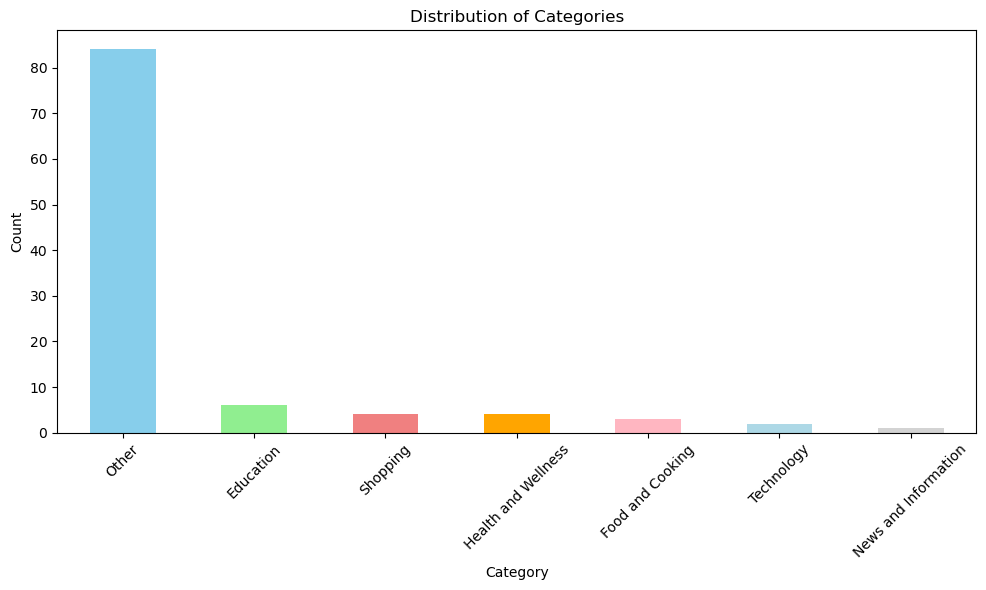

In [5]:
import matplotlib.pyplot as plt

# Assuming 'data' is already defined with the cleaned DataFrame and categories are counted

# Distribution of categories
category_counts = data['Category'].value_counts()

# Define colors for each category
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink', 'lightblue', 'lightgrey']

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Analysis of Language Distribution

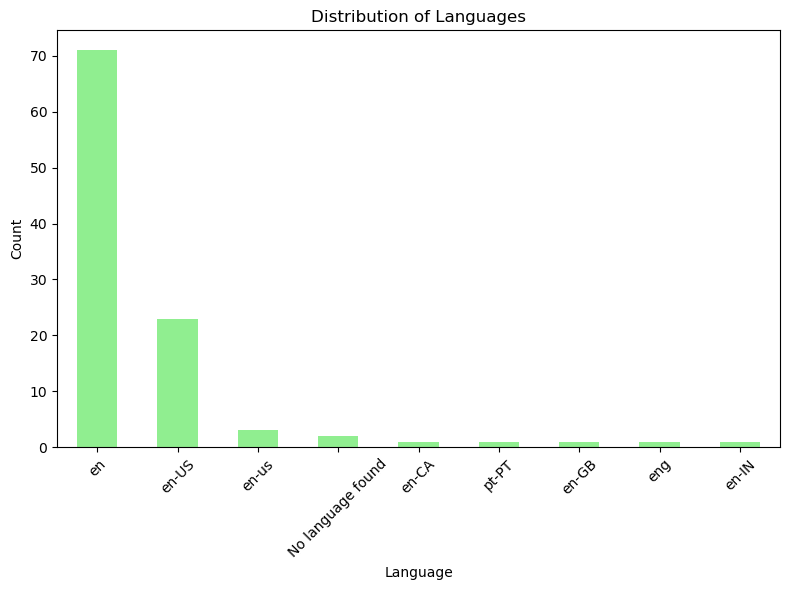

In [6]:
# Count language occurrences
language_counts = data['Language'].value_counts()

plt.figure(figsize=(8, 6))
language_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Frequency of Social Media Presence

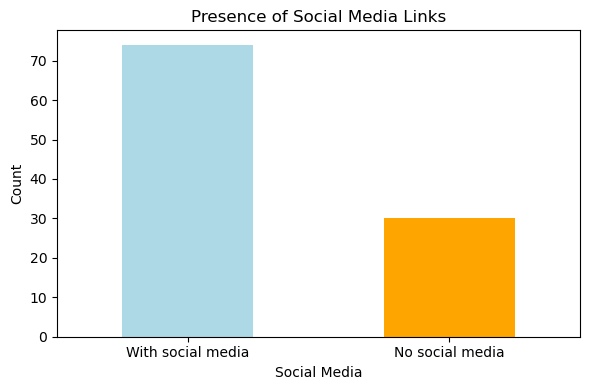

In [7]:
# Count the presence of social media links
social_media_presence = data['Social Media Links'].apply(lambda x: 'No social media' if x == 'No social media' else 'With social media')

social_media_counts = social_media_presence.value_counts()

plt.figure(figsize=(6, 4))
social_media_counts.plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Presence of Social Media Links')
plt.xlabel('Social Media')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


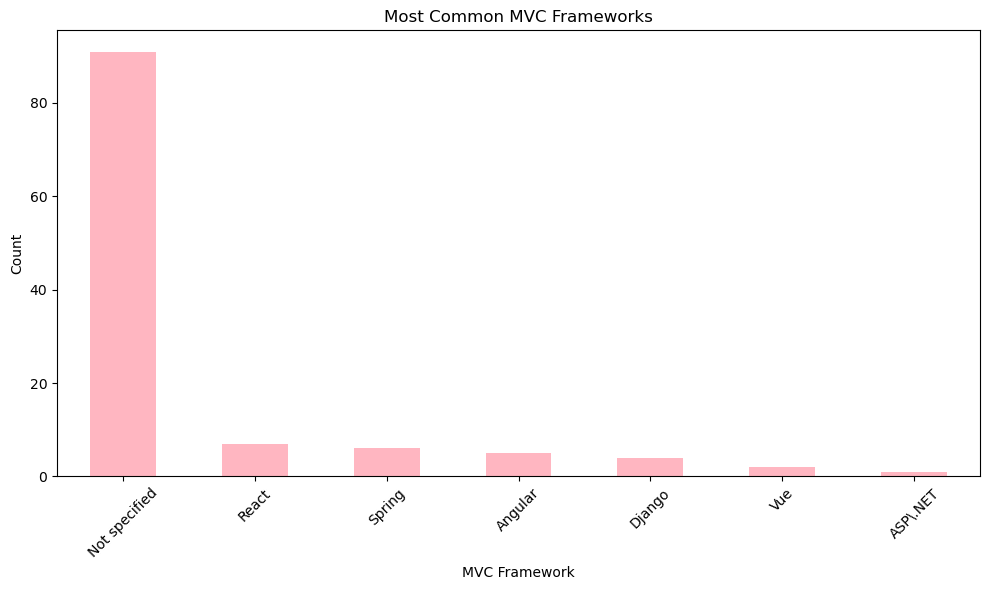

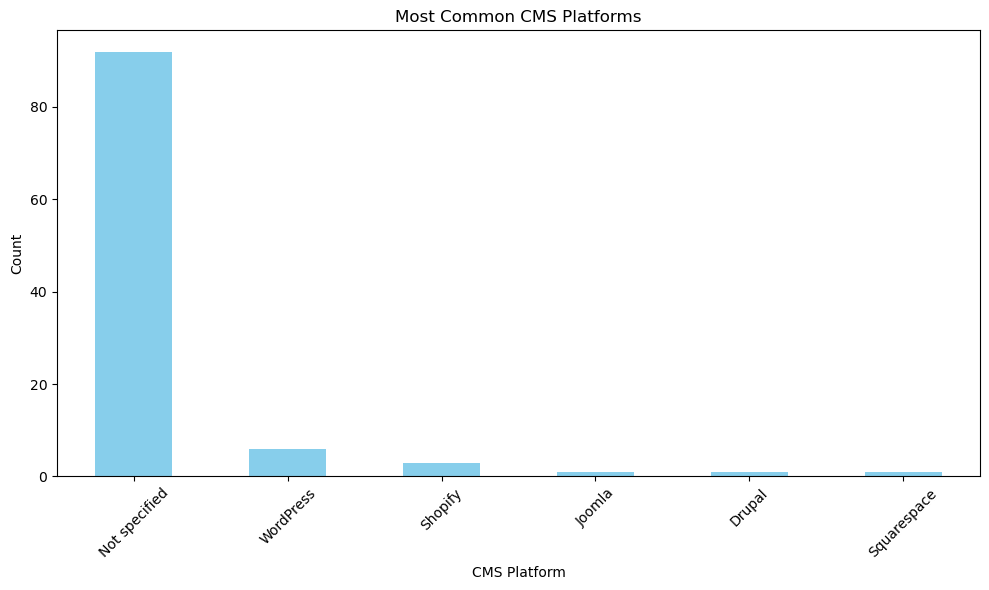

In [8]:
# Count occurrences of MVC Frameworks
mvc_frameworks = data['MVC Frameworks'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
mvc_frameworks.head(10).plot(kind='bar', color='lightpink')
plt.title('Most Common MVC Frameworks')
plt.xlabel('MVC Framework')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Count occurrences of CMS Platforms
cms_platforms = data['CMS Platforms'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
cms_platforms.head(10).plot(kind='bar', color='skyblue')
plt.title('Most Common CMS Platforms')
plt.xlabel('CMS Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


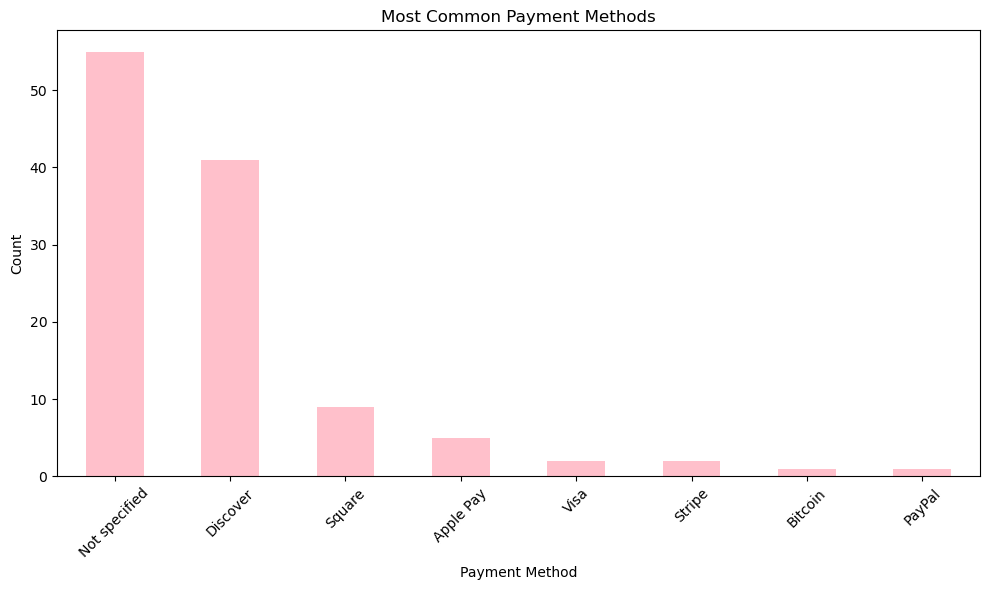

In [14]:
# Count occurrences of Payment Methods
payment_methods = data['Payment Methods'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
payment_methods.head(10).plot(kind='bar', color='pink')
plt.title('Most Common Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
